In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/49'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['3.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/49/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/49/3.json


In [3]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/49/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[7494, 7486, 7497, 7430, 7444, 7443, 7521, 7492, 7524, 7496, 7523, 7520, 7493, 7500, 7519, 7473, 7522, 7484, 7475, 7457, 7445, 7490, 7482, 7479, 7478, 7456, 7471, 7477, 7472, 7474, 7487, 7485, 7483, 7476, 7451, 7480]


In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb/open-data/data/matches/49/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,7494,Houston Dash,Utah Royals
1,7486,Portland Thorns,Houston Dash
2,7497,Chicago Red Stars,North Carolina Courage
3,7430,Washington Spirit,North Carolina Courage
4,7444,North Carolina Courage,Chicago Red Stars
5,7443,Portland Thorns,OL Reign
6,7521,NJ/NY Gotham FC,Utah Royals
7,7492,Orlando Pride,NJ/NY Gotham FC
8,7524,Houston Dash,Orlando Pride
9,7496,Utah Royals,Washington Spirit


In [7]:
#temporary_match_list = [69225, 69212] #(27, 23/ (25, 23)/ (18, 23))


shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,299fdda2-7839-4b1c-b1b9-4120d3e5c751,79,1,2022-11-24 00:01:49.708,1,49,6,Houston Dash,5058.0,Rachel Daly,...,Carry,Ground Pass,103.0,45.0,106.0,45.0,7494,Houston Dash,Utah Royals,Home
1,5f3e6c10-836c-4271-9e94-765793928032,221,1,2022-11-24 00:05:11.516,5,11,15,Utah Royals,6817.0,Christen Annemarie Press,...,Carry,Ground Pass,91.0,20.0,117.0,37.0,7494,Houston Dash,Utah Royals,Away
2,3c3c6217-2c77-4052-83ba-cfd4e68945b4,297,1,2022-11-24 00:07:49.708,7,49,21,Houston Dash,5043.0,Nichelle Patrice Prince,...,Pressure,Ground Pass,94.0,42.0,120.0,44.4,7494,Houston Dash,Utah Royals,Home
3,131b399d-2593-4b76-9b0b-83fcffbee82f,734,1,2022-11-24 00:18:04.774,18,4,36,Utah Royals,4975.0,Gunnhildur Yrsa Jónsdóttir,...,Carry,Ground Pass,95.0,45.0,98.0,44.0,7494,Houston Dash,Utah Royals,Away
4,2d58d7c6-d786-4708-8f08-09a4d09a0c7c,778,1,2022-11-24 00:19:03.837,19,3,37,Houston Dash,5105.0,Sofia Huerta,...,Ball Receipt*,Ground Pass,108.0,40.0,120.0,35.2,7494,Houston Dash,Utah Royals,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,a67aae35-512a-4698-8cc3-ef53d9ad1076,2589,2,2022-11-24 00:34:34.763,79,34,162,OL Reign,5077.0,Jasmyne Spencer,...,Ball Receipt*,High Pass,112.0,40.0,120.0,44.8,7480,OL Reign,Utah Royals,Home
1037,5f8fa35b-f47b-4f40-8efd-c5bf6b4365a9,2922,2,2022-11-24 00:43:31.563,88,31,184,Utah Royals,5028.0,Katie Bowen,...,Tactical Shift,Ground Pass,97.0,55.0,113.0,43.0,7480,OL Reign,Utah Royals,Away
1038,9b399ccd-0288-45b6-92f9-cbd65c10dbf1,2925,2,2022-11-24 00:43:32.374,88,32,184,Utah Royals,5101.0,Samantha Johnson,...,Goal Keeper,Ground Pass,108.0,44.0,114.0,47.0,7480,OL Reign,Utah Royals,Away
1039,4c1c9232-1361-468b-a0b2-22239fc1897d,2960,2,2022-11-24 00:44:33.694,89,33,186,OL Reign,8298.0,Megan Anna Rapinoe,...,Carry,Ground Pass,103.0,37.0,106.0,35.0,7480,OL Reign,Utah Royals,Home


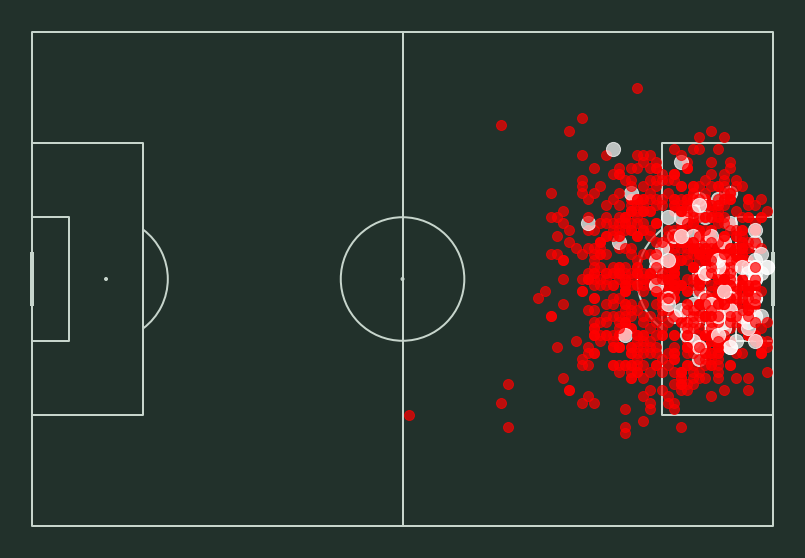

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("NWSL.xlsx")